In [1]:
!pip install folium

In [3]:
import pandas as pd
import folium

#대학교 정보 엑셀파일을 데이터프레임으로 변환
df=pd.read_excel('D:/MHKang02/Jupyter/data/서울지역 대학교 위치.xlsx',engine='openpyxl')
print(df)

seoul_map = folium.Map(location=[37.5662952,126.9779451], zoom_start=12)


# 대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(df.학교, df.위도, df.경도):
    folium.Marker([lat, lng], tooltip=name).add_to(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul_colleges.html')
seoul_map

                학교         위도          경도
0     KAIST 서울캠퍼스   37.592573  127.046737
1            KC대학교  37.548345  126.854797
2     가톨릭대학교(성신교정)  37.585922  127.004328
3     가톨릭대학교(성의교정)  37.499623  127.006065
4         감리교신학대학교  37.567645  126.961610
5            건국대학교  37.540762  127.079343
6     경기대학교 서울캠퍼스   37.300485  127.035833
7     경희대학교 서울캠퍼스   37.596195  127.052544
8            고려대학교  37.590700  127.027700
9            광운대학교  37.619496  127.059696
10           국민대학교  37.609641  126.997697
11         덕성여자대학교  37.651199  127.016160
12           동국대학교  37.557477  127.002052
13         동덕여자대학교  37.606320  127.041808
14    명지대학교 서울캠퍼스   37.580205  126.923445
15           삼육대학교  37.642952  127.105476
16    상명대학교 서울캠퍼스   37.602638  126.955252
17           서강대학교  37.550944  126.941002
18           서경대학교  37.615095  127.013111
19       서울과학기술대학교  37.631668  127.077481
20         서울교육대학교  37.489961  127.016412
21         서울기독대학교  37.600923  126.912382
22           서울대학교  37.459882  126

In [4]:
import csv
f1=open('D:/MHKang02/Jupyter/data/LOCAL_PEOPLE_DONG_202309.csv', encoding='utf8')
data=csv.reader(f1)

next(data)
data=list(data)
print(len(data))


295104


In [5]:
f2=open('D:/MHKang02/Jupyter/data/dong_code.csv',encoding='utf8')
code_data=csv.reader(f2)
next(code_data)
next(code_data)
code_data=list(code_data)
print(len(code_data))

424


In [6]:
print(data[0])

['20230901', '00', '11305606', '16725.1626', '668.1093', '357.14589999999998', '387.14789999999999', '408.79559999999998', '383.45159999999998', '409.46260000000001', '502.96159999999998', '488.16449999999998', '657.4606', '611.87390000000005', '590.12310000000002', '502.65219999999999', '428.92230000000001', '1095.3970999999999', '463.52510000000001', '279.15960000000001', '401.27449999999999', '491.1533', '473.19170000000003', '465.23239999999998', '573.61540000000002', '431.49220000000003', '822.31500000000005', '686.10450000000003', '751.86239999999998', '658.57039999999995', '545.83820000000003', '2190.1595000000002', '']


In [7]:
print(code_data[0])

['1101053', '11110530', '서울', '종로구', '사직동']


In [8]:
## 생활인구수 데이터를 숫자로
for row in data:
    for i in range(1,32):
        if i<= 2:
            row[i]=int(row[i])
        else:
            row[i]=float(row[i])
print(data[0])  

['20230901', 0, 11305606, 16725.1626, 668.1093, 357.1459, 387.1479, 408.7956, 383.4516, 409.4626, 502.9616, 488.1645, 657.4606, 611.8739, 590.1231, 502.6522, 428.9223, 1095.3971, 463.5251, 279.1596, 401.2745, 491.1533, 473.1917, 465.2324, 573.6154, 431.4922, 822.315, 686.1045, 751.8624, 658.5704, 545.8382, 2190.1595, '']


In [9]:
## 행자부행정동코드를 정수로
for row in code_data:
    row[1]=int(row[1])

print(code_data[0])    

['1101053', 11110530, '서울', '종로구', '사직동']


In [22]:
dong_name=input('행정동명을 입력 : ')
for row in code_data:
    if row[-1]==dong_name:
        dong_code=row[1]
print(dong_name, '의 행정코드는 ', dong_code, '입니다' )

행정동명을 입력 : 연남동
연남동 의 행정코드는  11440710 입니다


In [11]:
## 입력한 동의 9월 총 생활인구 수

s=0
for row in data:
    if row[2]==dong_code:
        s+=row[3]

print(dong_name, ' 의 9월 총 생활인구수', s)

한남동  의 9월 총 생활인구수 21959992.895099998


In [12]:
##  입력한 동의 9월 0시 생활인구 합

s=0
for row in data:
    if row[2]==dong_code and row[1]==0:
        s+=row[3]
print(dong_name,"0시 생활인구 합 : ",s)


한남동 0시 생활인구 합 :  740365.3411999999


In [16]:
##  입력한 동의 9월 0시 평균, 15시 평균

s0, s15, cnt0, cnt15 =0,0,0,0

for row in data:
    if row[2]==dong_code and row[1]==0:
        s0 += row[3]
        cnt0 +=1
    elif row[2]==dong_code and row[1]==15:
        s15 += row[3]
        cnt15 +=1
        
print(dong_name,"0시 생활인구 평균 : ",s0/cnt0)
print(dong_name,"15시 생활인구 평균 : ",s15/cnt15)

한남동 0시 생활인구 평균 :  25529.839351724135
한남동 15시 생활인구 평균 :  38311.28623448276


In [23]:
# s=[]
# for i in range(24):
#     s.append(0)

## 시간대별(0~23) 평균    
    
s=[0 for i in range(24)]

for row in data:
    if row[2]==dong_code:
        s[row[1]] += row[3]

#print(s)

s=[j/30  for j in s]
print(s)


[16943.216953333333, 16915.19871, 16875.053783333336, 16813.938043333335, 16751.266046666664, 16551.461043333333, 16401.42454, 16209.622846666667, 15370.248173333333, 15194.074216666664, 15375.015566666667, 15798.413339999997, 16504.72829, 16865.749186666668, 17174.84569, 17299.87960666667, 17399.850656666666, 17726.923526666666, 18158.565599999998, 18327.572376666663, 17881.50286333333, 17022.790773333334, 16521.45840666667, 17032.347986666668]


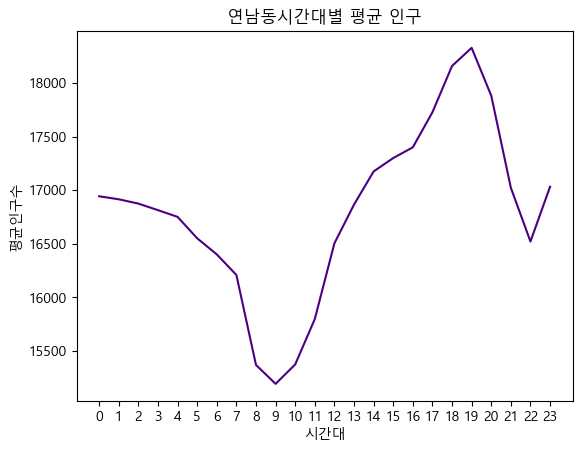

In [24]:
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.title(dong_name + '시간대별 평균 인구')
plt.plot(range(24), s, color='indigo')
plt.xticks(range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

### 두개 동 비교

첫번째 행정동을 입력하세요 --> 서초1동
두번째 행정동을 입력하세요 --> 한남동


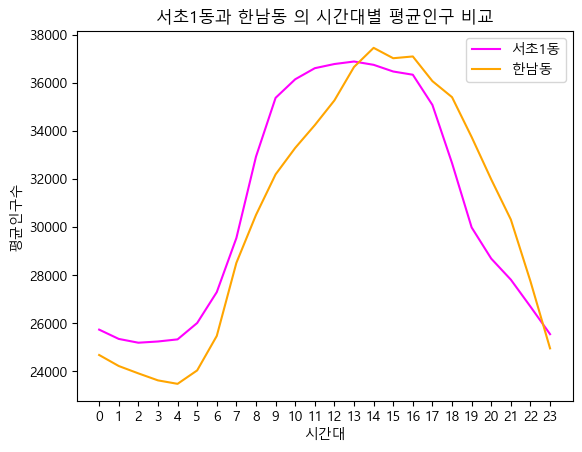

In [26]:
# 행정동-1
dong_name1 = input('첫번째 행정동을 입력하세요 --> ')
for row in code_data: 
    if row[-1] == dong_name1: 
        dong_code1 = int(row[1])

# 행정동-2
dong_name2 = input('두번째 행정동을 입력하세요 --> ')
for row in code_data: 
    if row[-1] == dong_name2: 
        dong_code2 = int(row[1])


population1 = [0 for i in range(24)]
population2 = [0 for i in range(24)]

for row in data: 
    # 행정동-1 인 경우
    if row[2] == dong_code1: 
        population1[row[1]] += row[3]

    # 행정동-2 인 경우
    elif row[2] == dong_code2: 
        population2[row[1]] += row[3]

population1 = [p/30 for p in population1]
population2 = [p/30 for p in population2]


plt.rc('font', family='Malgun Gothic')
plt.title(dong_name1 + '과 '+dong_name2+' 의 시간대별 평균인구 비교')
plt.plot(range(24), population1, color = 'magenta', label=dong_name1)
plt.plot(range(24), population2, color = 'orange', label =dong_name2)
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.show()


## 남녀 시간대별 평균인구

In [ ]:
## 4~17열 : 남성
## 18~31 : 여성

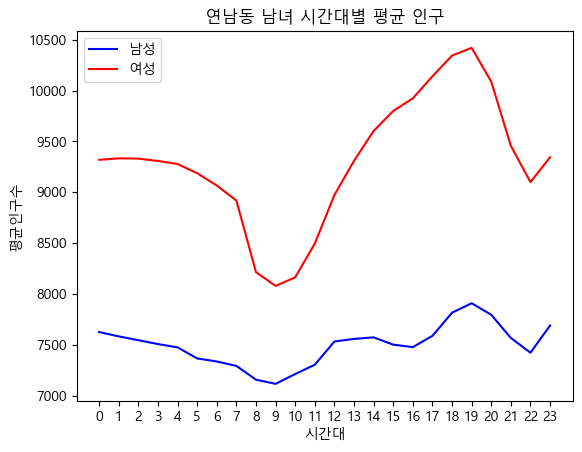

In [28]:
import matplotlib.pyplot as plt

male = [0 for i in range(24)]
female = [0 for i in range(24)]

for row in data: 
    if row[2] == dong_code: 
        male[row[1]] += sum(row[4:18])      # 남성 인구 총합 구하기  
        female[row[1]] += sum(row[18:32])   # 여성 인구 총합 구하기

male = [m/30 for m in male]
female = [f/30 for f in female]    

plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + ' 남녀 시간대별 평균 인구')
plt.plot(range(24), male, color = 'b', label='남성')
plt.plot(range(24), female, color = 'r', label ='여성')
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.legend()
plt.xticks(range(24))
plt.show() 

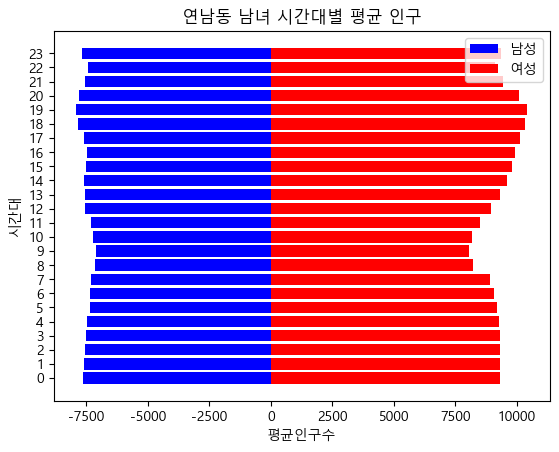

In [31]:
male = [-m for m in male]
plt.rcParams['axes.unicode_minus']=False

plt.rc('font', family='Malgun Gothic')
plt.title(dong_name + ' 남녀 시간대별 평균 인구')
plt.barh(range(24), male, color = 'b', label='남성')
plt.barh(range(24), female, color = 'r', label ='여성')
plt.ylabel('시간대')
plt.xlabel('평균인구수')
plt.legend()
plt.yticks(range(24))
plt.show() 

## 생활인구수를 기준으로 내림차순정렬 후  1~10위 까지만 나타내기

In [9]:
import csv

# 인구 데이터 읽어와서 리스트로 저장하기
f1 = open('D:/MHKang02/Jupyter/data/LOCAL_PEOPLE_DONG_202309.csv', encoding='utf8')    
data = csv.reader(f1)
next(data)
data = list(data)

# 행정동코드 데이터 불러와서 리스트로 저장하기
f2 = open('D:/MHKang02/Jupyter/data/dong_code.csv', encoding='utf8')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)


# 위치(위도,경도) 데이터 불러와서 리스트로 저장하기
f3 = open('D:/MHKang02/Jupyter/data/dong_location.csv')
location_data = csv.reader(f3)
next(location_data)
location_data = list(location_data)


# 인구데이터의 데이터타입 변경하기 
for row in data : 
    for i in range(1, 32) : 
        if i <= 2 : 
            row[i] = int(row[i])
        else : 
            row[i] = float(row[i])
            
# 행정동코드 데이터의 데이터 타입 변환하기
for row in code_data :
    row[1] = int(row[1])
    
    
# 위치 정보 데이터의 데이터 타입 변환하기
for row in location_data :      ###  row[-2]:경도, row[-1]:위도
    row[-2], row[-1] = float(row[-2]), float(row[-1])
    

In [10]:
# 2. 행정동별 인구수를 저장하는 빈 딕셔너리를 만들고 행정동별 총생활인구를 딕셔너리에 저장하기

dong_population = {}

for row in data: 
    dong_code, p = row[2], row[3]
    if dong_code not in dong_population.keys(): 
        dong_population[dong_code] = p
    else:
        dong_population[dong_code] += p
        
print(dong_population) 

{11305606: 10078326.866100011, 11230710: 14823483.113200016, 11470570: 8362824.370399991, 11305620: 11916664.748299995, 11305600: 8199473.598499993, 11500615: 24086831.717800003, 11215770: 16766488.062100006, 11290640: 11967141.796900002, 11350640: 19171088.61189999, 11350630: 24727949.064300034, 11230560: 22292913.694199994, 11560700: 10609906.966200005, 11710566: 14820077.972499998, 11170650: 7812682.900999996, 11260580: 11681844.829700006, 11620525: 12214149.307900006, 11170630: 17301911.524599984, 11530790: 15344054.424300004, 11710642: 28658107.176800016, 11440590: 17046099.3479, 11350720: 8647506.347, 11380632: 8696252.316200007, 11560535: 35499664.735200025, 11680690: 11464848.821499998, 11620715: 6948849.771000001, 11440710: 12093454.446800014, 11680700: 32292671.52150001, 11230730: 13793453.422000017, 11230705: 14461249.101499975, 11590680: 16392003.86169999, 11500560: 12378839.28549998, 11620575: 15751766.650099998, 11200660: 14137768.168900004, 11500605: 7875920.8611999955, 

In [11]:
# 3. 인구수를 기준으로 내림차순 정렬하고, 위에서 10개 항목만 별도로 저장하기
import operator

top10 = sorted(dong_population.items(), key=operator.itemgetter(1), reverse = True)[:10]
print(top10)

top10_code = [t[0] for t in top10]  
print(top10_code)

[(11680640, 71458480.62219994), (11560540, 68581818.43039998), (11440660, 50814483.53329998), (11650530, 44501744.07370002), (11110615, 43788937.55249999), (11410585, 42266149.91200004), (11545510, 40389995.36679996), (11380690, 39563796.63450001), (11740685, 38602817.3747), (11680650, 37097130.23050002)]
[11680640, 11560540, 11440660, 11650530, 11110615, 11410585, 11545510, 11380690, 11740685, 11680650]


In [12]:
top10_name = [0 for i in range(10)]
top10_lat  = [0 for i in range(10)]
top10_long = [0 for i in range(10)]

# 4. 8자리 행정동코드에 해당하는 행정동명 찾기
for i in range(len(top10_code)) : 
    for row in code_data : 
        if row[1] == top10_code[i] :  
            # 행정동명 리스트에 저장하기 
            top10_name[i] = row[-1]
            
    # 5. 행정동명에 해당하는 위도와 경도를 찾아 리스트에 저장하기
    for row in location_data : 
        if row[3] == top10_name[i] :
            top10_lat[i], top10_long[i] = row[-1], row[-2] 

print(top10_name)            
print(top10_lat)
print(top10_long)
           

['역삼1동', '여의도동', '서교동', '서초3동', '종로1.2.3.4가동', '신촌동', '가산동', '진관동', '길동', '역삼2동']
[37.4999211, 37.5286662, 37.5550337, 37.4856591, 37.5777701, 37.5659638, 37.4756389, 37.64193, 37.5398758, 37.4984733]
[127.0367584, 126.9290731, 126.9228533, 127.0097616, 126.9892737, 126.9384315, 126.8850721, 126.9387277, 127.1473638, 127.0449272]


In [13]:
# 6. 완성된 리스트 지도에 표시하기

import folium

for i in range(len(top10_name)) : 
    top10_name[i] = str(i+1)+'. '+top10_name[i]
    
map_top10 = folium.Map([top10_lat[0], top10_long[0]], zoom_start=12)
for i in range(10): 
    folium.Marker(
        [top10_lat[i], top10_long[i]], tooltip=top10_name[i],
        icon=folium.Icon(color='red', icon='star')
        ).add_to(map_top10)

map_top10